In [24]:
import numpy as np
import cv2
import glob
import os
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt

# Task 1: Bag of Words

## 1.1 Regular grid

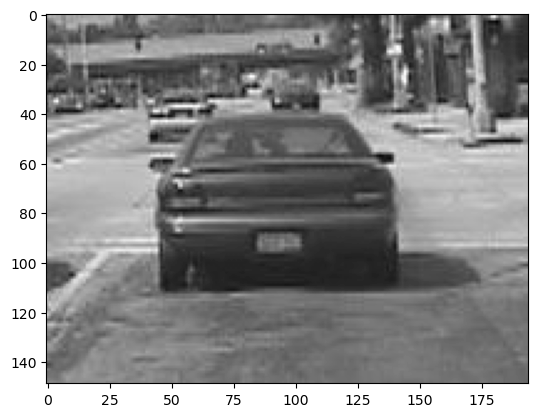

In [26]:
border = 8
img = cv2.imread("data/data_bow/cars-training-pos/image_0001.png", cv2.IMREAD_GRAYSCALE)
H, W = img.shape[:2]
min_x, max_x = border-1, W-border-1
plt.imshow(img, cmap="gray")

In [54]:

def grid_points(img, nPointsX, nPointsY, border):
    """
    Generate a regular grid of points on the input image.

    Args:
    - img: Input image.
    - nPointsX: Number of grid points in the x dimension.
    - nPointsY: Number of grid points in the y dimension.
    - border: Border size (in pixels) to leave around the image.

    Returns:
    - vPoints: List of grid points [(x1, y1), (x2, y2), ...].
    """

    # Get the dimensions of the input image
    height, width = img.shape[:2]

    # Calculate the spacing between grid points in both dimensions
    x_spacing = (width - 2 * border) / (nPointsX - 1)
    y_spacing = (height - 2 * border) / (nPointsY - 1)

    vPoints = []

    # Generate grid points
    for i in range(nPointsY):
        for j in range(nPointsX):
            # Calculate the coordinates of the grid point
            x = int(border + j * x_spacing)
            y = int(border + i * y_spacing)
            vPoints.append((x, y))

    return np.array(vPoints)

# Example usage:
# Load an image (you can use any image you want)
# img = cv2.imread('your_image.png')
# Define the parameters
nPointsX = 10
nPointsY = 10
border = 8
# Call the grid_points function to get the grid points
vPoints = grid_points(img, nPointsX, nPointsY, border)
print(vPoints.shape)
print(vPoints)
print(nPointsX*nPointsY)

(100, 2)
[[  8   8]
 [ 27   8]
 [ 47   8]
 [ 67   8]
 [ 87   8]
 [106   8]
 [126   8]
 [146   8]
 [166   8]
 [186   8]
 [  8  22]
 [ 27  22]
 [ 47  22]
 [ 67  22]
 [ 87  22]
 [106  22]
 [126  22]
 [146  22]
 [166  22]
 [186  22]
 [  8  37]
 [ 27  37]
 [ 47  37]
 [ 67  37]
 [ 87  37]
 [106  37]
 [126  37]
 [146  37]
 [166  37]
 [186  37]
 [  8  52]
 [ 27  52]
 [ 47  52]
 [ 67  52]
 [ 87  52]
 [106  52]
 [126  52]
 [146  52]
 [166  52]
 [186  52]
 [  8  67]
 [ 27  67]
 [ 47  67]
 [ 67  67]
 [ 87  67]
 [106  67]
 [126  67]
 [146  67]
 [166  67]
 [186  67]
 [  8  81]
 [ 27  81]
 [ 47  81]
 [ 67  81]
 [ 87  81]
 [106  81]
 [126  81]
 [146  81]
 [166  81]
 [186  81]
 [  8  96]
 [ 27  96]
 [ 47  96]
 [ 67  96]
 [ 87  96]
 [106  96]
 [126  96]
 [146  96]
 [166  96]
 [186  96]
 [  8 111]
 [ 27 111]
 [ 47 111]
 [ 67 111]
 [ 87 111]
 [106 111]
 [126 111]
 [146 111]
 [166 111]
 [186 111]
 [  8 126]
 [ 27 126]
 [ 47 126]
 [ 67 126]
 [ 87 126]
 [106 126]
 [126 126]
 [146 126]
 [166 126]
 [186 126]
 

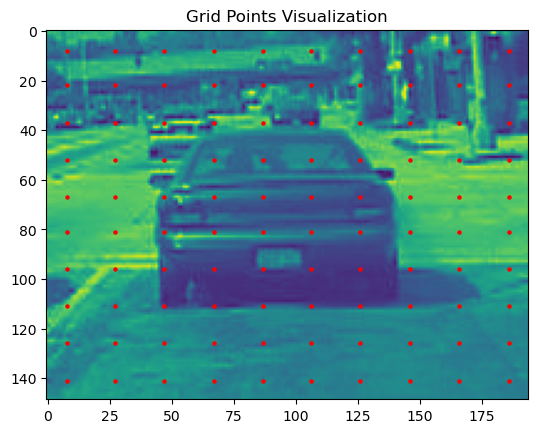

In [55]:
def visualize_grid_points(img, vPoints, title="Grid Points"):
    """
    Visualize grid points on the input image.

    Args:
    - img: Input image.
    - vPoints: List of grid points [(x1, y1), (x2, y2), ...].
    - title: Title for the visualization (optional).
    """
    
    # Create a copy of the input image to avoid modifying the original image
    img_copy = img.copy()

    # Plot the image
    plt.imshow(img_copy)

    # Plot the grid points as red dots
    for point in vPoints:
        x, y = point
        plt.scatter(x, y, c='red', s=5)

    # Add a title (if provided)
    plt.title(title)

    # Show the image with grid points
    plt.show()

# Example usage:
# Load an image (you can use any image you want)
# img = cv2.imread('your_image.png')
# Call the visualize_grid_points function to visualize the grid points
visualize_grid_points(img, vPoints, title="Grid Points Visualization")


## 1.2 HOG descriptors

In [96]:
def descriptors_hog(img, vPoints, cellWidth, cellHeight):
    nBins = 8
    w = cellWidth
    h = cellHeight

    grad_x = cv2.Sobel(img, cv2.CV_16S, dx=1, dy=0, ksize=1)
    grad_y = cv2.Sobel(img, cv2.CV_16S, dx=0, dy=1, ksize=1)

    # print(grad_x.shape) -> H x W

    # plt.imshow(grad_x, cmap="gray")
    # return None

    descriptors = []  # list of descriptors for the current image, each entry is one 128-d vector for a grid point
    for i in range(len(vPoints)):
        center_x = round(vPoints[i, 0])
        center_y = round(vPoints[i, 1])

        desc = []
        for cell_y in range(-2, 2):
            for cell_x in range(-2, 2):

                # start and end x, y indices for a given cell comprised of w*h pixels
                start_y = center_y + (cell_y) * h
                end_y = center_y + (cell_y + 1) * h

                start_x = center_x + (cell_x) * w
                end_x = center_x + (cell_x + 1) * w

                # todo
                # compute the angles
                # compute the histogram

                # Extract gradients for image patch
                patch_y = grad_y[start_y:end_y, start_x:end_x]
                patch_x = grad_x[start_y:end_y, start_x:end_x]

                # Orientations for each pixel in cell, from 0 to 360 degrees
                orientations = np.arctan2(patch_y, patch_x) * (180/np.pi) + 180
                # print(f"orientations: {orientations.shape}, should be 4x4")
                # print(f"max orientations: {np.max(orientations)}")
                # print(f"min orientations: {np.min(orientations)}")

                # Ensure dominant orientation is at 0 degrees
                dominant_orientation = np.mean(orientations)
                # print(f"Dominant orientation: {dominant_orientation}")
                orientations_shifted = (orientations - dominant_orientation) % 360
                # print(f"max orientations shifted: {np.max(orientations_shifted)}")
                # print(f"min orientations shifted: {np.min(orientations_shifted)}")

                # Compute histogram of orientations
                hist, bin_edges = np.histogram(orientations_shifted, bins=nBins)
                desc.append(hist)

        desc = np.array(desc).flatten()
        descriptors.append(desc)

    descriptors = np.asarray(descriptors) # [nPointsX*nPointsY, 128], descriptor for the current image (100 grid points)
    return descriptors

In [97]:
descriptors_hog(img, vPoints, 4, 4).shape
# img.shape

(100, 128)

## 1.3 Codebook generation

In [98]:
def create_codebook(nameDirPos, nameDirNeg, k, numiter):
    """
    :param nameDirPos: dir to positive training images
    :param nameDirNeg: dir to negative training images
    :param k: number of kmeans cluster centers
    :param numiter: maximum iteration numbers for kmeans clustering
    :return: vCenters: center of kmeans clusters, numpy array, [k, 128]
    """
    vImgNames = sorted(glob.glob(os.path.join(nameDirPos, '*.png')))
    vImgNames = vImgNames + sorted(glob.glob(os.path.join(nameDirNeg, '*.png')))

    nImgs = len(vImgNames)

    cellWidth = 4
    cellHeight = 4
    nPointsX = 10
    nPointsY = 10
    border = 8

    vFeatures = []  # list for all features of all images (each feature: 128-d, 16 histograms containing 8 bins)
    # Extract features for all image
    for i in tqdm(range(nImgs)):
        # print('processing image {} ...'.format(i+1))
        img = cv2.imread(vImgNames[i])  # [172, 208, 3]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # [h, w]

        # Collect local feature points for each image, and compute a descriptor for each local feature point
        # todo
        
        # Get grid points
        vPoints = grid_points(img, nPointsX, nPointsY, border)
        # Compute descriptors
        descriptors = descriptors_hog(img, vPoints, cellWidth, cellHeight)  # [num_descriptors, 128]
        vFeatures.append(descriptors)

    vFeatures = np.asarray(vFeatures)  # [n_imgs, n_vPoints, 128]
    vFeatures = vFeatures.reshape(-1, vFeatures.shape[-1])  # [n_imgs*n_vPoints, 128]
    print('number of extracted features: ', len(vFeatures))


    # Cluster the features using K-Means
    print('clustering ...')
    kmeans_res = KMeans(n_clusters=k, max_iter=numiter).fit(vFeatures)
    vCenters = kmeans_res.cluster_centers_  # [k, 128]
    return vCenters

In [99]:
vCenters = create_codebook("data/data_bow/cars-training-pos/", "data/data_bow/cars-training-neg/", 2, 100)
vCenters.shape

100%|██████████| 100/100 [00:19<00:00,  5.12it/s]
/home/james/anaconda3/envs/cv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


number of extracted features:  10000
clustering ...


(2, 128)